### Pyber Data Analysis

* "Urban" city type has realtively lower average fare per ride compared to the "Rural" and "Suburban" city types.

* Count of rides per city and count of drivers per city increases and the average fare price decreases from "Rural" to "Suburban" to "Urban" city types respectively.

* "Urban" city type has the largest amount of total fare, number of rides and driver count (60% to 80 % ) than "Suburban" (15% to 30%) and "Rural" (<10%) city types respectively.

* The total fare and rides count percentage values for "Urban" city type are clsoe (62.7%) and (68.4%) respectively where as the driver count percentage for "Urban" city type is significantly higher at (80.9%) value.

-----


In [76]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "./data/city_data.csv"
ride_data_to_load = "./data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = ride_data.merge(city_data, on="city", how="left")

# Display the data table for preview
pyber_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

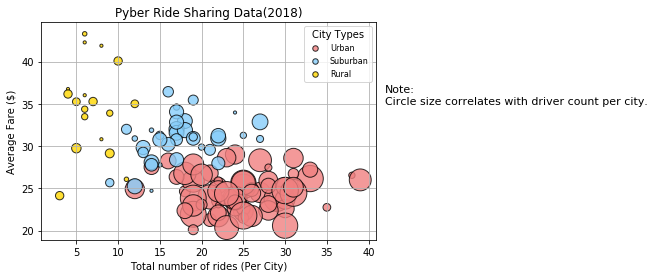

In [77]:
# Obtain the x and y coordinates for each of the three city types
ride_sharing_df = pyber_data.groupby(["city", "type"], as_index=False).agg({
                                            "fare": "mean", "ride_id": "count", "driver_count": "mean"}).rename(columns={
                                            "fare": "average_fare", "ride_id": "rides_count"})

# Three City Types: ['Urban' 'Suburban' 'Rural']
urban_df =  ride_sharing_df[ride_sharing_df.type == "Urban"]
suburban_df =  ride_sharing_df[ride_sharing_df.type == "Suburban"]
rural_df = ride_sharing_df[ride_sharing_df.type == "Rural"]

# Build the scatter plots for each city types
# Color Scheme: Gold, Light Sky Blue, and Light Coral

# Multiplier number for the marker size array
N=10

# Urban City Type
plt.scatter(urban_df["rides_count"], urban_df["average_fare"], label="Urban", s=(urban_df["driver_count"]*N), 
            color="lightcoral", alpha=0.8, edgecolors="black", linewidths=1)

# Suburban City Type
plt.scatter(suburban_df["rides_count"], suburban_df["average_fare"], label="Suburban", s=(suburban_df["driver_count"]*N), 
            color="lightskyblue", alpha=0.8, edgecolors="black", linewidths=1)

# Rural City Type
plt.scatter(rural_df["rides_count"], rural_df["average_fare"], label="Rural", s=(rural_df["driver_count"]*N), 
            color="gold", alpha=0.8, edgecolors="black", linewidths=1)

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total number of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data(2018)")

# Create a legend
lgnd = plt.legend(loc="best", title="City Types", fontsize=8)

# Setting equal size for all legend icons
for lh in lgnd.legendHandles:
    lh._sizes = [30]
    
# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.", fontsize=11)

# Save Figure
plt.savefig("./Output/PyberRideSharing.png", bbox_inches="tight")


In [78]:
# Show plot
plt.show()

## Total Fares by City Type

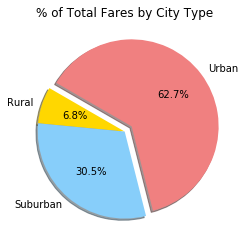

In [79]:
# Calculate Type Percents
ride_sharing_df["total_fare"] = ride_sharing_df["average_fare"] * ride_sharing_df["rides_count"]
city_type_df = ride_sharing_df.groupby(["type"], as_index=False).agg({
                                            "total_fare": "sum", "rides_count": "sum", "driver_count": "sum"})

city_type_df["percent_of_total_fare"] = city_type_df["total_fare"] / sum(city_type_df["total_fare"]) * 100

# Build Pie Chart
labels = city_type_df["type"]
sizes = city_type_df["percent_of_total_fare"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("./Output/TotalFaresbyCityType.png")


In [80]:
# Show Figure
plt.show()

## Total Rides by City Type

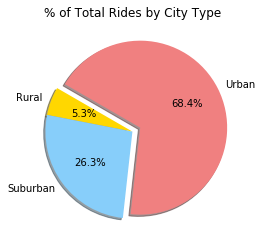

In [81]:
# Calculate Ride Percents
city_type_df["percent_of_total_rides"] = city_type_df["rides_count"] / sum(city_type_df["rides_count"]) * 100

# Build Pie Chart
labels = city_type_df["type"]
sizes = city_type_df["percent_of_total_rides"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("./Output/TotalRidesbyCityType.png")


In [82]:
# Show Figure
plt.show()

## Total Drivers by City Type

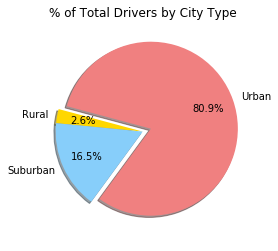

In [83]:
# Calculate Driver Percents
city_type_df["percent_of_total_drivers"] = city_type_df["driver_count"] / sum(city_type_df["driver_count"]) * 100

# Build Pie Charts
labels = city_type_df["type"]
sizes = city_type_df["percent_of_total_drivers"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", 
            shadow=True, startangle=165, pctdistance=0.7)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("./Output/TotalDriversbyCityType.png")


In [84]:
# Show Figure
plt.show()